In [1]:
%load_ext autoreload
%autoreload 2

from RBM import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# it's interesting to test this code with p == 1.0 or p == 0.0 ;)
p = .8
X_train = np.random.binomial(n=1, p=p, size=(200, 2))
X_test  = np.random.binomial(n=1, p=p, size=(200, 2))

In [3]:
nn = RBM(layers=[
        BernoulliLayer(X_train.shape[1]),
        BernoulliLayer(3)
    ], loss_function='NLL')
nn.fit(X_train, n_epochs=100, learning_rate=.01, n_gibbs_steps=1, batch_size=10, test_size=0)

Initialisation...
weights:
[[-0.00892431 -0.0012524   0.01127819]
 [-0.0019936  -0.01086538 -0.00132518]]
bias (visible):
[[ 0.  0.]]
bias (hidden):
[[ 0.  0.  0.]]

epoch = 99; learning_rate = 0.01; criteria_train = 0.99068510928; 


In [4]:
print 'weights:\n', nn.weights
print 'bias (visible):\n', nn.layers[0].bias
print 'bias (hidden):\n',  nn.layers[1].bias

weights:
[[ 0.21708201  0.21518146  0.43258092]
 [ 0.3380356   0.27735996  0.57720417]]
bias (visible):
[[ 0.565  0.759]]
bias (hidden):
[[-0.0341922  -0.08126118  0.17986178]]


In [5]:
nn.predict_proba_mean(X_train), np.mean(X_train, axis=0), p

(array([ 0.75604958,  0.82099338]), array([ 0.765,  0.82 ]), 0.8)

In [6]:
nn.predict_proba_mean(X_test), np.mean(X_test, axis=0), p

(array([ 0.75432026,  0.81887883]), array([ 0.78 ,  0.775]), 0.8)

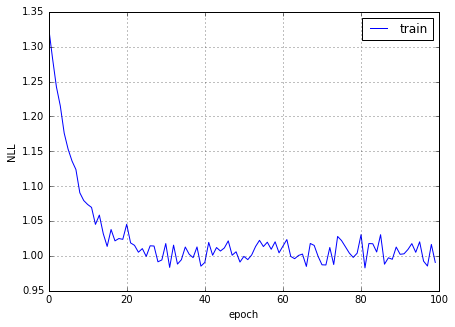

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(nn.error_train, label='train')
if nn.error_test:
    plt.plot(nn.error_test, label='CV')
plt.xlabel('epoch')
plt.ylabel(nn.loss_function)
plt.legend()
plt.grid()